In [30]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

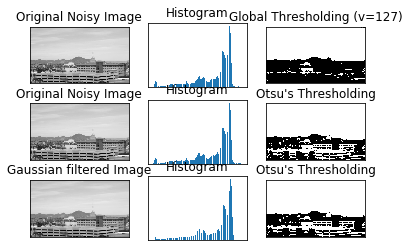

/Users/jo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: ignoring size because footprint is set


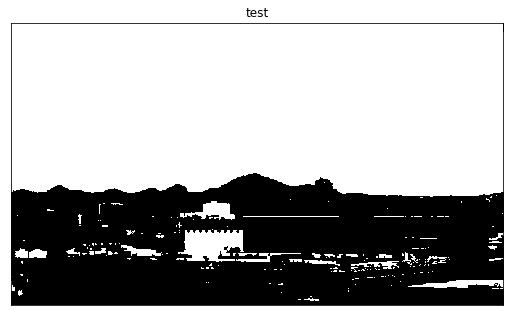

In [31]:
img = cv2.imread('try.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 30
fig_size[1] = 22
plt.rcParams["figure.figsize"] = fig_size


import scipy as sp
import scipy.ndimage

def flood_fill(test_array,h_max=255):
    input_array = np.copy(test_array) 
    el = sp.ndimage.generate_binary_structure(2,2).astype(np.int)
    inside_mask = sp.ndimage.binary_erosion(~np.isnan(input_array), structure=el)
    output_array = np.copy(input_array)
    output_array[inside_mask]=h_max
    output_old_array = np.copy(input_array)
    output_old_array.fill(0)   
    el = sp.ndimage.generate_binary_structure(2,1).astype(np.int)
    while not np.array_equal(output_old_array, output_array):
        output_old_array = np.copy(output_array)
        output_array = np.maximum(input_array,sp.ndimage.grey_erosion(output_array, size=(3,3), footprint=el))
    return output_array

def show(img):
    plt.subplot(2,3,1),plt.imshow(img,'gray')
    plt.title("test")
    plt.xticks([]),plt.yticks([])
    
test = images[2].copy()
ff = flood_fill(test)
show(ff)

In [32]:
_, contours, _ =  cv2.findContours(ff,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [33]:
len(contours)

242

In [34]:
sor = sorted(contours,key = len,reverse = True)

In [35]:
img2 = cv2.imread('try.jpg',1)
dff = img2.copy()

In [36]:
fig_size[0] = 50
fig_size[1] = 34
plt.rcParams["figure.figsize"] = fig_size

In [37]:
sor[0].shape

(428, 1, 2)

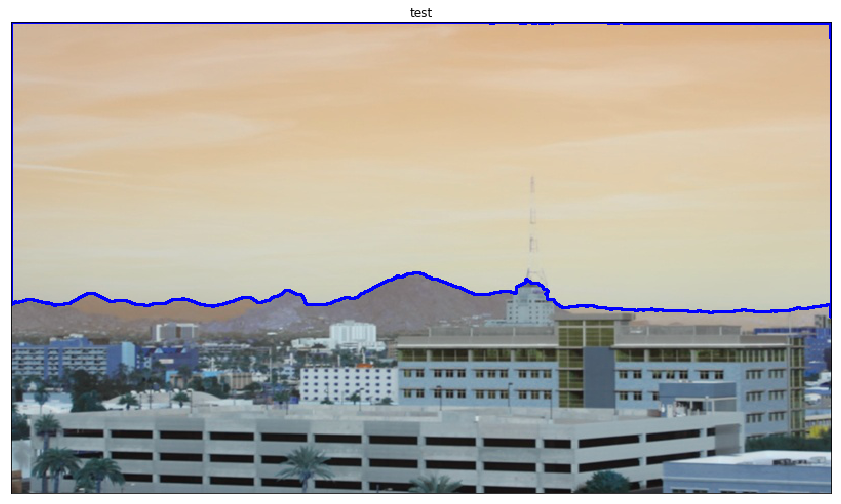

In [38]:
img2 = cv2.imread('try.jpg',1)
show(cv2.drawContours(img2,sor,0,(0,0,255),2))

In [39]:
cimg = np.zeros_like(img2)
cv2.drawContours(cimg, contours, 0, color=255, thickness=-1)
lst_intensities = []
# Access the image pixels and create a 1D numpy array then add to list
pts = np.where(cimg == 255)
lst_intensities.append(img[pts[0], pts[1]])

In [40]:
lst_intensities = []

# For each list of contour points...
for i in range(1):
    # Create a mask image that contains the contour filled in
    cimg = np.zeros_like(img2)
    cv2.drawContours(cimg, sor, i, color=255, thickness=-1)

    # Access the image pixels and create a 1D numpy array then add to list
    pts = np.where(cimg == 255)
    lst_intensities.append(img[pts[0], pts[1]])

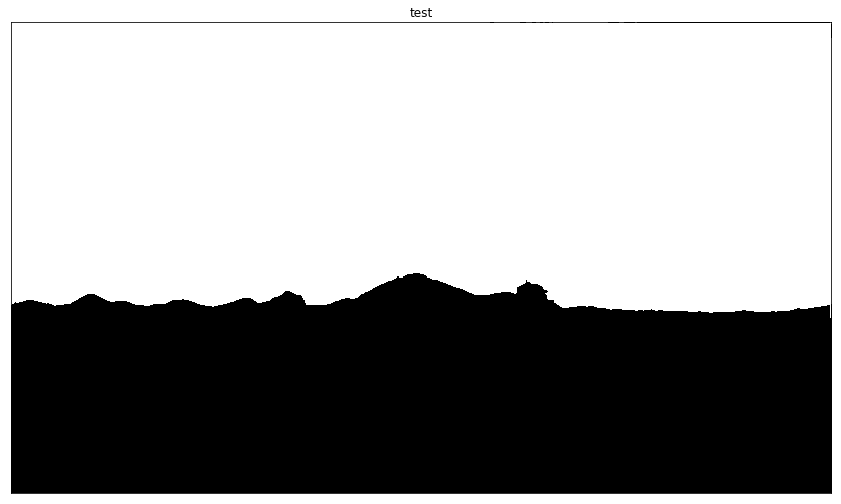

In [41]:
eg = np.zeros_like(img)
eg[pts[0],pts[1]] = 255
show(eg)